### Loss Functions
| ** Classification ** | ** Regression ** |
| -------------------- | ---------------- |
| Log Loss | Mean Square Error/Quadratic Loss |
| Focal Loss | Mean Absolute Error |
| KL Divergence/Relative Entropy | Huber Loss/Smooth Mean Absolute Error |
| Exponential Loss | Log cosh Loss |
| Hinge Loss | Quantile Loss |

## Classification Losses

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

** Binary Cross-Entropy **

In [4]:
def binary_cross_entropy(y, y_hat):
    loss = np.where(y == 1, np.log(y_hat), np.log(1 - y_hat))
    return -np.sum(loss)

In [5]:
y = np.repeat(1, 10000)
y_hat = np.arange(0, 1, 0.0001)

loss_bin_ce = [binary_cross_entropy(y[i], y_hat[i]) for i in range(len(y))]

Text(0.5,0,'Predictions')

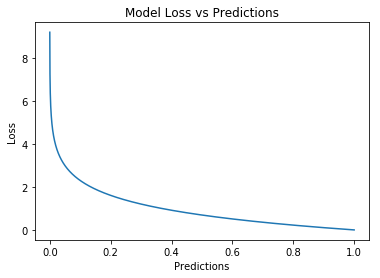

In [6]:
plt.figure() 
plt.plot(y_hat, loss_bin_ce)
plt.title('Model Loss vs Predictions')
plt.ylabel('Loss')
plt.xlabel('Predictions')

** Focal Loss **

In [9]:
def focal(y, y_hat, gamma):
    focal_loss = np.where(
        y==1,
        (1 - y_hat) ** gamma * (np.log(y_hat)),
        y_hat ** gamma * (np.log(1 - y_hat))
    )
    return -np.sum(focal_loss)

In [10]:
gammas = [0, 0.5, 1, 2, 5]
losses_focal = [[focal(y[i], y_hat[i], gamma) for i in range(len(y))] for gamma in gammas]

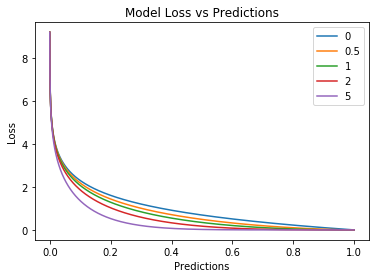

In [14]:
plt.figure() 
for i in range(len(gammas)):
    plt.plot(y_hat, losses_focal[i], label=gammas[i])
plt.title('Model Loss vs Predictions')
plt.ylabel('Loss')
plt.xlabel('Predictions')
plt.legend()

In [15]:
def square(y, y_hat):
    loss = (1 - y * y_hat) ** 2
    return np.sum(loss)

In [17]:
loss_square = [square(y[i], y_hat[i]) for i in range(len(y))]

Text(0.5,0,'Predictions')

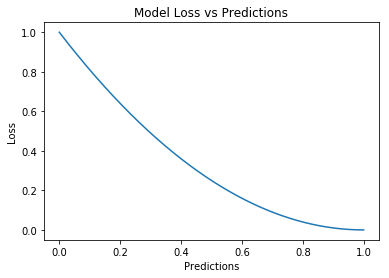

In [19]:
plt.figure() 
plt.plot(y_hat, loss_square)
plt.title('Model Loss vs Predictions')
plt.ylabel('Loss')
plt.xlabel('Predictions')

** Hinge Loss **

In [22]:
def hinge(y, y_hat):
    loss_hinge = np.max((0, (1 - y * y_hat)))
    return np.sum(loss_hinge)

In [23]:
loss_hinge = [hinge(y[i], y_hat[i]) for i in range(len(y))]

Text(0.5,0,'Predictions')

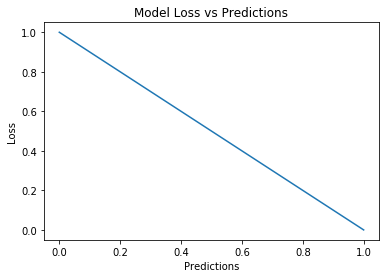

In [25]:
plt.figure() 
plt.plot(y_hat, loss_hinge)
plt.title('Model Loss vs Predictions')
plt.ylabel('Loss')
plt.xlabel('Predictions')

** Log Loss **

In [26]:
def log(y, y_hat):
    loss_log = np.log(1 + np.exp(-(y_hat * y))) / np.log(2)
    return np.sum(loss_log)

In [27]:
loss_log = [log(y[i], y_hat[i]) for i in range(len(y))]

Text(0.5,0,'Predictions')

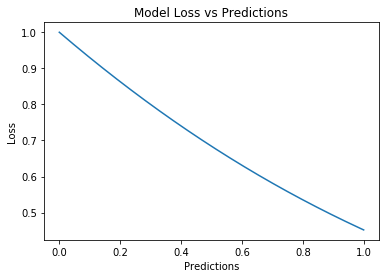

In [28]:
plt.figure() 
plt.plot(y_hat, loss_log)
plt.title('Model Loss vs Predictions')
plt.ylabel('Loss')
plt.xlabel('Predictions')

** Exponential Loss **

In [41]:
def expo(y, y_hat, power):
    loss_expo = np.exp(-y * y_hat * 100)
    return np.sum(loss_expo)

In [42]:
loss_exp = [expo(y[i], y_hat[i], 100) for i in range(len(y))]

Text(0.5,0,'Predictions')

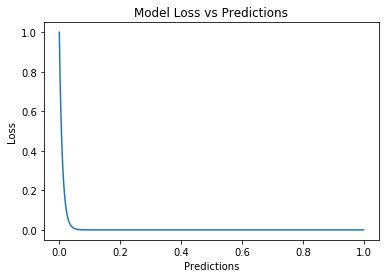

In [43]:
plt.figure() 
plt.plot(y_hat, loss_exp)
plt.title('Model Loss vs Predictions')
plt.ylabel('Loss')
plt.xlabel('Predictions')

** Kullback Leibler Divergence ** 

In [44]:
def kullback(y, y_hat):
    loss_kull = y_hat * (np.log(y_hat) - y)
    return np.sum(loss_kull)

In [45]:
loss_kull = [kullback(y[i], y_hat[i]) for i in range(len(y))]

Text(0.5,0,'Predictions')

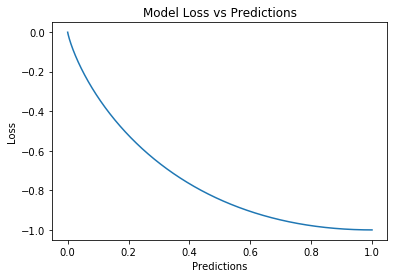

In [47]:
plt.figure() 
plt.plot(y_hat, loss_kull)
plt.title('Model Loss vs Predictions')
plt.ylabel('Loss')
plt.xlabel('Predictions')